In [ ]:
# Mount Google Drive
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)

drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
%pwd

'/content/drive/MyDrive/Shuffle_Animation'

In [ ]:
%cd drive/MyDrive/Shuffle_Animation

/content/drive/MyDrive/Shuffle_Animation


In [ ]:
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import numpy as np
import time

import librosa
from IPython.display import Audio
from typing import Union, Callable, Tuple
import matplotlib.mlab as mlab
# from pydub import AudioSegment

from scipy.signal import find_peaks
%matplotlib notebook


In [ ]:
cmaps = [('Perceptually Uniform Sequential', [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Cyclic', ['twilight', 'twilight_shifted', 'hsv']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'turbo', 'nipy_spectral',
            'gist_ncar'])]

In [ ]:
# modified order of cmaps after seeing video with the first cmaps
cmaps = [('Perceptually Uniform Sequential', [
'plasma', 'terrain', 'gist_stern', 'brg', 'ocean']),
('Sequential', [
'cividis', 'afmhot', 'summer', 'copper', 'gnuplot', 'flag',
'tab20', 'tab20b', 'twilight', 'tab20c', 'gnuplot2', 'BuPu',
'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'BuGn']),
('Sequential (2)', [
'BuGn', 'viridis', 'viridis', 'viridis', 'viridis', 'viridis',
'spring', 'autumn', 'winter', 'winter', 'cool', 'hot',
'hot', 'hot', 'hot', 'hot']),
('Diverging', [
'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
('Qualitative', [
'Pastel1', 'Pastel2', 'Paired', 'Accent',
'Dark2', 'Set1', 'Set2', 'Set3',
'tab10', 'tab20', 'tab20b', 'tab20c']),
('Miscellaneous', [
'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
'gist_rainbow', 'rainbow', 'jet', 'turbo', 'nipy_spectral',
'gist_ncar'])]

In [ ]:
# modified order of cmaps after seeing video with the second cmaps
cmaps = [('Perceptually Uniform Sequential', [
'plasma', 'terrain', 'gnuplot', 'brg', 'ocean']),
('Sequential', [
'cividis', 'afmhot', 'summer', 'copper', 'gist_stern', 'flag',
'CMRmap', 'gnuplot2', 'twilight', 'twilight', 'twilight', 'BuPu',
'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'PuBuGn', 'PuBuGn']),
('Sequential (2)', [
'PuBuGn', 'BuGn', 'viridis', 'viridis', 'viridis', 'viridis',
'spring', 'autumn', 'winter', 'winter', 'cool', 'hot',
'hot', 'hot', 'hot', 'copper']),
('Diverging', [
'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
('Qualitative', [
'Pastel1', 'Pastel2', 'Paired', 'Accent',
'Dark2', 'Set1', 'Set2', 'Set3',
'tab10', 'tab20', 'tab20b', 'tab20c']),
('Miscellaneous', [
'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
'gist_rainbow', 'rainbow', 'jet', 'turbo', 'nipy_spectral',
'gist_ncar'])]

In [ ]:
# modified order of cmaps after seeing video with the third cmaps
cmaps = [('Perceptually Uniform Sequential', [
'plasma', 'terrain', 'gnuplot', 'brg', 'ocean']),
('Sequential', [
'cividis', 'afmhot', 'summer', 'copper', 'gist_stern', 'flag',
'CMRmap', 'gnuplot2', 'gnuplot2', 'BuPu',
'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'PuBuGn', 'PuBuGn']),
('Sequential (2)', [
'PuBuGn', 'BuGn', 'viridis', 'viridis', 'viridis', 'viridis',
'spring', 'autumn', 'winter', 'winter', 'cool', 'hot',
'hot', 'hot', 'hot', 'copper']),
('Diverging', [
'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
('Cyclic', ['twilight_shifted', 'twilight_shifted', 'twilight_shifted']),
('Qualitative', [
'Pastel1', 'Pastel2', 'Paired', 'Accent',
'Dark2', 'Set1', 'Set2', 'Set3',
'tab10', 'tab20', 'tab20b', 'tab20c']),
('Miscellaneous', [
'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
'gist_rainbow', 'rainbow', 'jet', 'turbo', 'nipy_spectral',
'gist_ncar'])]

In [ ]:
# modified order of cmaps after seeing video with the 4th cmaps
cmaps = [('Perceptually Uniform Sequential', [
'plasma', 'terrain', 'gnuplot', 'brg', 'ocean']),
('Sequential', [
'cividis', 'afmhot', 'summer', 'copper', 'gist_stern', 'flag',
'CMRmap', 'gnuplot2', 'gnuplot2', 'BuPu',
'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'PuBuGn', 'PuBuGn']),
('Sequential (2)', [
'PuBuGn', 'PuBuGn', 'PuBuGn', 'BuGn', 'viridis', 'viridis',
'viridis', 'viridis', 'spring', 'autumn', 'winter', 'cool',
'hot', 'hot', 'hot', 'copper']),
('Diverging', [
'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
('Cyclic', ['twilight_shifted', 'twilight_shifted', 'twilight_shifted']),
('Qualitative', [
'Pastel1', 'Pastel2', 'Paired', 'Accent',
'Dark2', 'Set1', 'Set2', 'Set3',
'tab10', 'tab20', 'tab20b', 'tab20c']),
('Miscellaneous', [
'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
'gist_rainbow', 'rainbow', 'jet', 'turbo', 'nipy_spectral',
'gist_ncar'])]

In [22]:
# modified order of cmaps after seeing video with the 4th cmaps
cmaps = [('Perceptually Uniform Sequential', [
'plasma', 'terrain', 'gnuplot', 'brg', 'ocean']),
('Sequential', [
'cividis', 'afmhot', 'summer', 'copper', 'gist_stern', 'flag',
'CMRmap', 'gnuplot2', 'gnuplot2', 'BuPu',
'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'PuBuGn', 'PuBuGn']),
('Sequential (2)', [
'PuBuGn', 'PuBuGn', 'PuBuGn', 'BuGn', 'viridis', 'viridis',
'viridis', 'viridis', 'spring', 'autumn', 'winter', 'cool',
'cool', 'hot', 'hot', 'copper']),
('Diverging', [
'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
('Cyclic', ['twilight_shifted', 'twilight_shifted', 'twilight_shifted']),
('Qualitative', [
'Pastel1', 'Pastel2', 'Paired', 'Accent',
'Dark2', 'Set1', 'Set2', 'Set3',
'tab10', 'tab20', 'tab20b', 'tab20c']),
('Miscellaneous', [
'prism', 'cubehelix', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
'gist_rainbow', 'rainbow', 'jet', 'turbo', 'nipy_spectral',
'gist_ncar'])]

In [32]:
# modified order of cmaps after seeing video with the ?th cmaps
cmaps = [('Perceptually Uniform Sequential', [
'plasma', 'terrain', 'gnuplot', 'brg', 'ocean']),
('Sequential', [
'cividis', 'afmhot', 'summer', 'copper', 'gist_stern', 'flag',
'CMRmap', 'gnuplot2', 'gnuplot2', 'BuPu',
'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'PuBuGn', 'PuBuGn']),
('Sequential (2)', [
'PuBuGn', 'PuBuGn', 'PuBuGn', 'BuGn', 'viridis', 'viridis',
'viridis', 'viridis', 'spring', 'autumn', 'winter', 'cool',
'cool', 'hot', 'hot', 'hot', 'copper']),
('Diverging', [
'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
('Cyclic', ['twilight_shifted', 'twilight_shifted', 'twilight_shifted']),
('Qualitative', [
'Pastel1', 'Pastel2', 'Paired', 'Accent',
'Dark2', 'Set1', 'Set2', 'Set3',
'tab10', 'tab20', 'tab20b', 'tab20c']),
('Miscellaneous', [
'prism', 'cubehelix', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
'gist_rainbow', 'rainbow', 'jet', 'turbo', 'nipy_spectral',
'gist_ncar'])]

In [33]:
cmaps_list = []
for category, cmap_names in cmaps:
    for cmap_name in cmap_names:
        cmaps_list.append(cmap_name)

In [34]:
cmaps_list

['plasma',
 'terrain',
 'gnuplot',
 'brg',
 'ocean',
 'cividis',
 'afmhot',
 'summer',
 'copper',
 'gist_stern',
 'flag',
 'CMRmap',
 'gnuplot2',
 'gnuplot2',
 'BuPu',
 'GnBu',
 'PuBu',
 'YlGnBu',
 'PuBuGn',
 'PuBuGn',
 'PuBuGn',
 'PuBuGn',
 'PuBuGn',
 'PuBuGn',
 'BuGn',
 'viridis',
 'viridis',
 'viridis',
 'viridis',
 'spring',
 'autumn',
 'winter',
 'cool',
 'cool',
 'hot',
 'hot',
 'hot',
 'copper',
 'PiYG',
 'PRGn',
 'BrBG',
 'PuOr',
 'RdGy',
 'RdBu',
 'RdYlBu',
 'RdYlGn',
 'Spectral',
 'coolwarm',
 'bwr',
 'seismic',
 'twilight_shifted',
 'twilight_shifted',
 'twilight_shifted',
 'Pastel1',
 'Pastel2',
 'Paired',
 'Accent',
 'Dark2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'prism',
 'cubehelix',
 'ocean',
 'gist_earth',
 'terrain',
 'gist_stern',
 'gnuplot',
 'gnuplot2',
 'CMRmap',
 'cubehelix',
 'brg',
 'gist_rainbow',
 'rainbow',
 'jet',
 'turbo',
 'nipy_spectral',
 'gist_ncar']

In [35]:
vid_path = "shuffle.mp4"
audio_path = "shuffle.mp3"

In [36]:
cap = cv2.VideoCapture(str(vid_path))
success,image = cap.read()
fps = round(cap.get(cv2.CAP_PROP_FPS))
print(fps)

30


In [37]:
with open('peak_frames.npy', 'rb') as f: # scroll far below to see how I generated the peak_frames, aka the frames with the loudest sounds.
# I don't feel like copying and rerunning it in an another file.
    peak_frames = np.load(f)
peak_frames

array([  0.,   2.,   8.,  13.,  18.,  23.,  27.,  30.,  36.,  45.,  54.,
        59.,  60.,  73.,  81.,  88.,  94., 101., 110., 117., 123., 131.,
       140., 147., 152., 174., 181., 187., 200., 214., 228., 245., 258.,
       268., 274., 286., 296., 302., 315., 326., 343., 355., 373., 385.,
       397., 407., 418., 430., 444., 457., 472., 488., 502., 516., 532.,
       546., 560., 573., 588., 598., 603., 617., 628., 635., 650., 658.,
       664., 683., 692., 704., 736., 748., 760., 776., 797., 810., 819.,
       835., 844., 855.])

In [38]:
peak_frames[12] = 65 # I see the first peak at 65 frames instead of 60

In [29]:
peak_frames

array([  0.,   2.,   8.,  13.,  18.,  23.,  27.,  30.,  36.,  45.,  54.,
        59.,  65.,  73.,  81.,  88.,  94., 101., 110., 117., 123., 131.,
       140., 147., 152., 174., 181., 187., 200., 214., 228., 245., 258.,
       268., 274., 286., 296., 302., 315., 326., 343., 355., 373., 385.,
       397., 407., 418., 430., 444., 457., 472., 488., 502., 516., 532.,
       546., 560., 573., 588., 598., 603., 617., 628., 635., 650., 658.,
       664., 683., 692., 704., 736., 748., 760., 776., 797., 810., 819.,
       835., 844., 855.])

In [43]:
frame_num = 0
current_cmap_index = None
current_cmap = None

cap = cv2.VideoCapture(str(vid_path))
success,image = cap.read()

while success:
    print(frame_num)
    if frame_num < 65:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    elif frame_num in peak_frames:
        if current_cmap_index == None:
            current_cmap_index = 0
        else:
            current_cmap_index += 1
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        current_cmap = cmaps_list[current_cmap_index]
    else:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.imsave(f'shuffle_images/shuffle_colorful_frames/frame_{frame_num:03d}.png', image, cmap=current_cmap)
    success,image = cap.read() # read new frame
    # print('Read a new frame: ', success)
    frame_num += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

# Finding peak frames (aka the frames in which the sound peaks)

In [ ]:
# using librosa to read in audio samples from a sound file (e.g. .mp3 or .wav) as a numpy array

# The r in front to the string is to treat the string as a "raw string".
# This guarantees that characters like `\n` get interpreted literally,
# and not in special ways (e.g. like a line break)
local_song_path = r"shuffle.mp3"

duration = 30  # seconds

# load the digital signal for the first 11 seconds of the song
samples, sampling_rate = librosa.load(local_song_path, sr=44100, mono=True, duration=duration)

/Users/eloisezeng/opt/anaconda3/envs/week1/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


In [ ]:
print(samples.dtype)
print(samples.shape)
print(samples.min(), samples.max())

float32
(1263616,)
-0.63041687 0.674881


In [ ]:
Audio(samples, rate=sampling_rate)

In [ ]:
1263616 / 44100 # so the video is actually about 28.65 seconds long

28.65342403628118

In [ ]:
n_samples_orig = samples.shape[0]
sample_rate = 44100
times = np.arange(n_samples_orig) / sample_rate

<IPython.core.display.Javascript object>


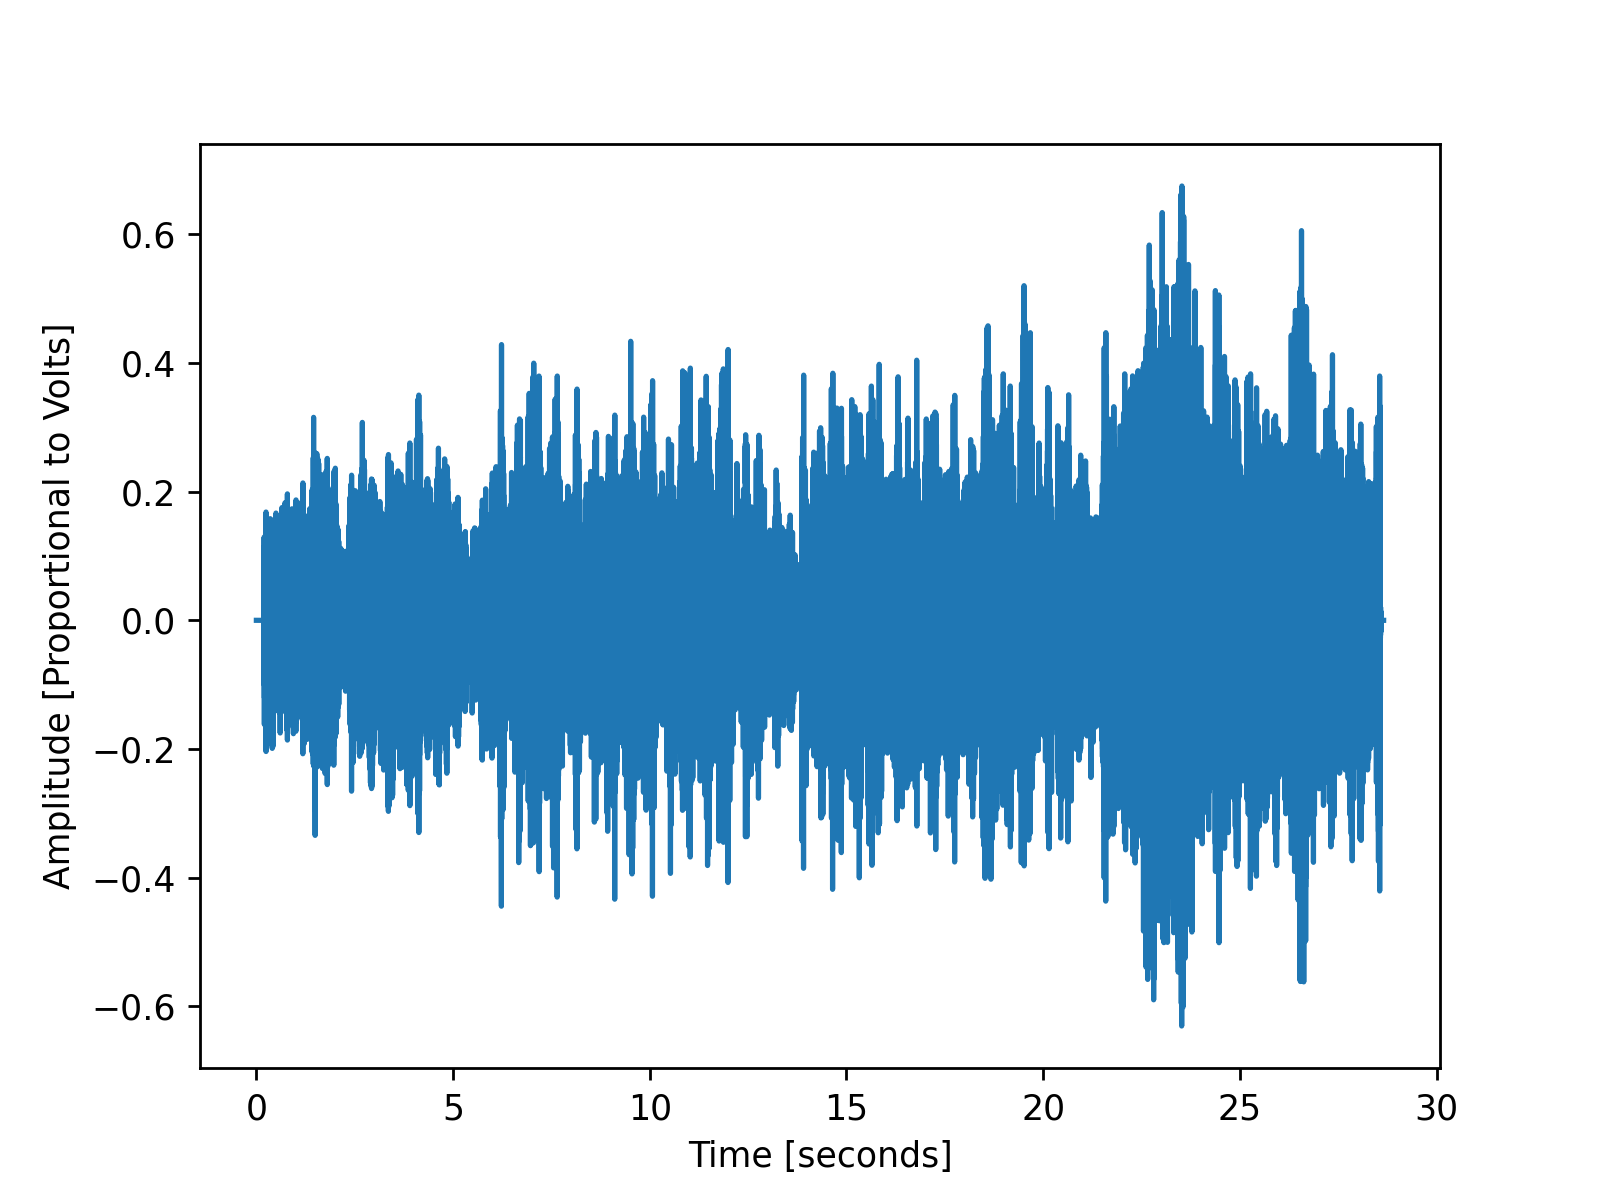

In [ ]:
fig, ax = plt.subplots(1, 1)

ax.plot(times[:n_samples_orig], samples[:n_samples_orig])
ax.set_xlabel("Time [seconds]")
ax.set_ylabel("Amplitude [Proportional to Volts]");

<IPython.core.display.Javascript object>


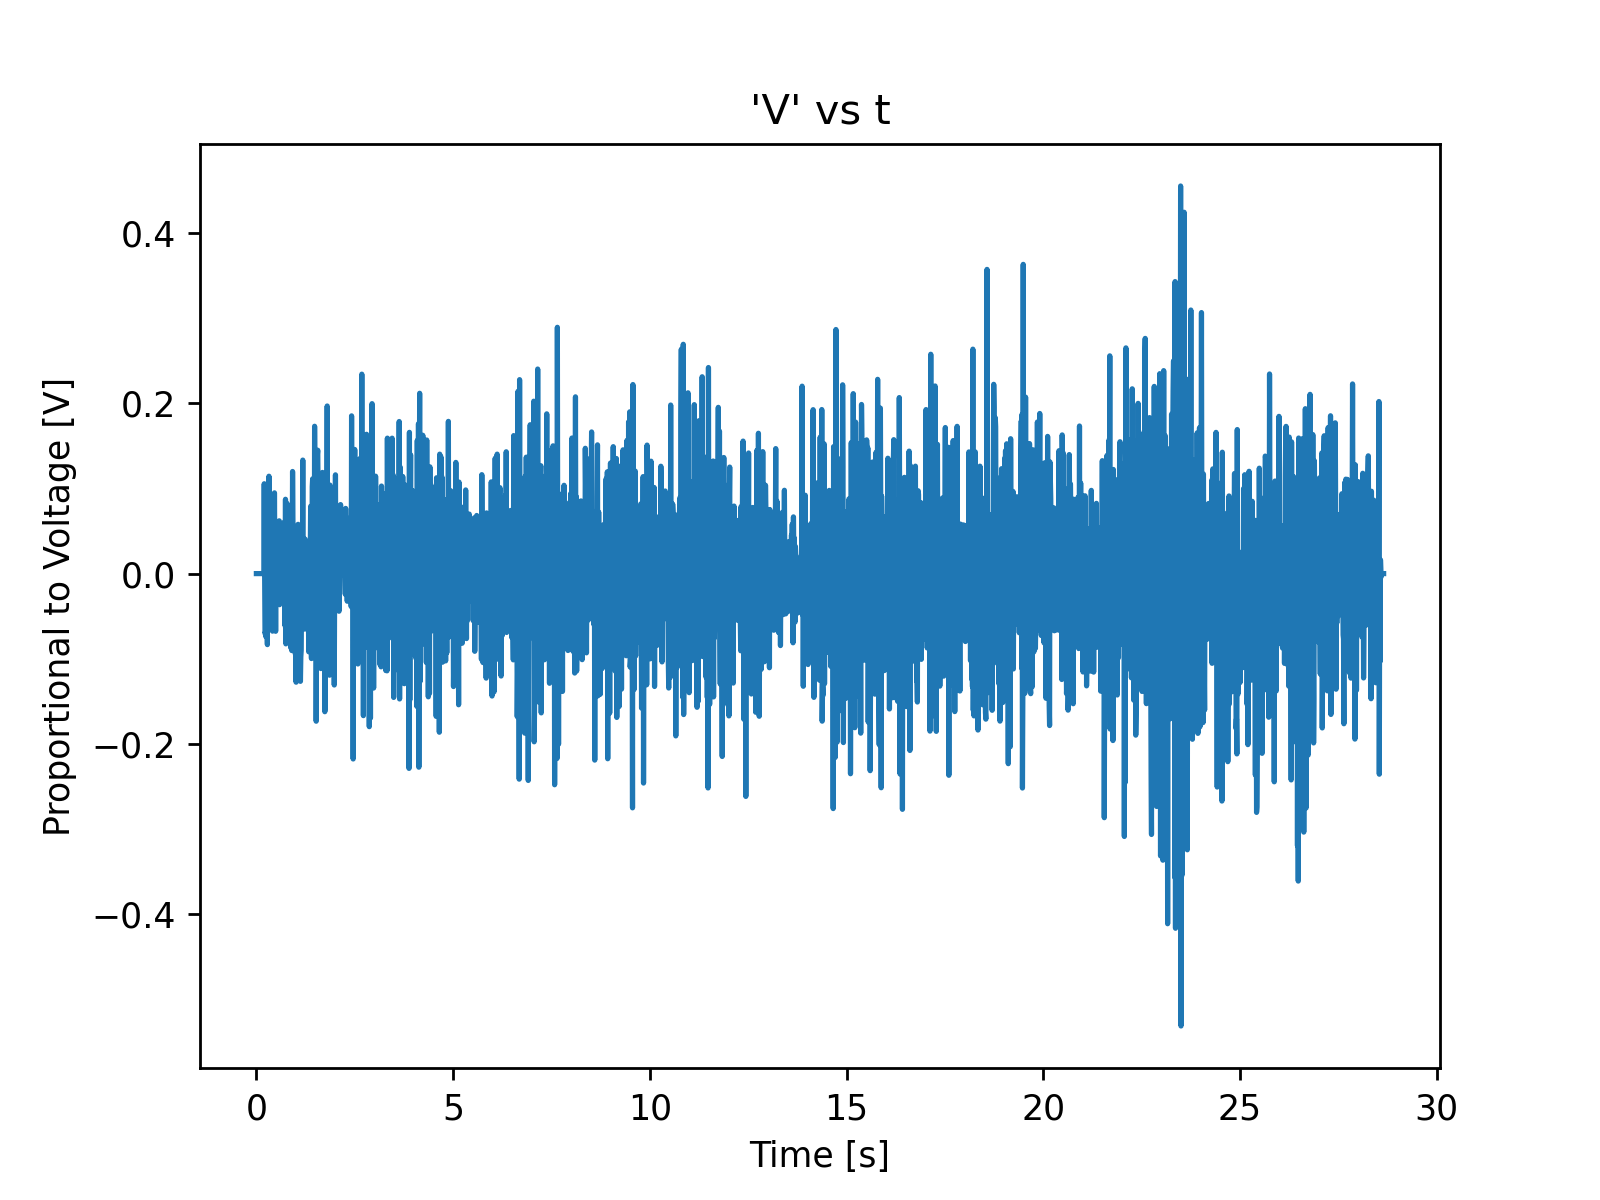

In [ ]:
fig, ax = plt.subplots()
ax.plot(times[::441], samples[::441]) # plot sound every 100th of a second
ax.set_xlabel("Time [s]")
ax.set_ylabel("Proportional to Voltage [V]")
ax.set_title("'V' vs t")
plt.show()

<IPython.core.display.Javascript object>


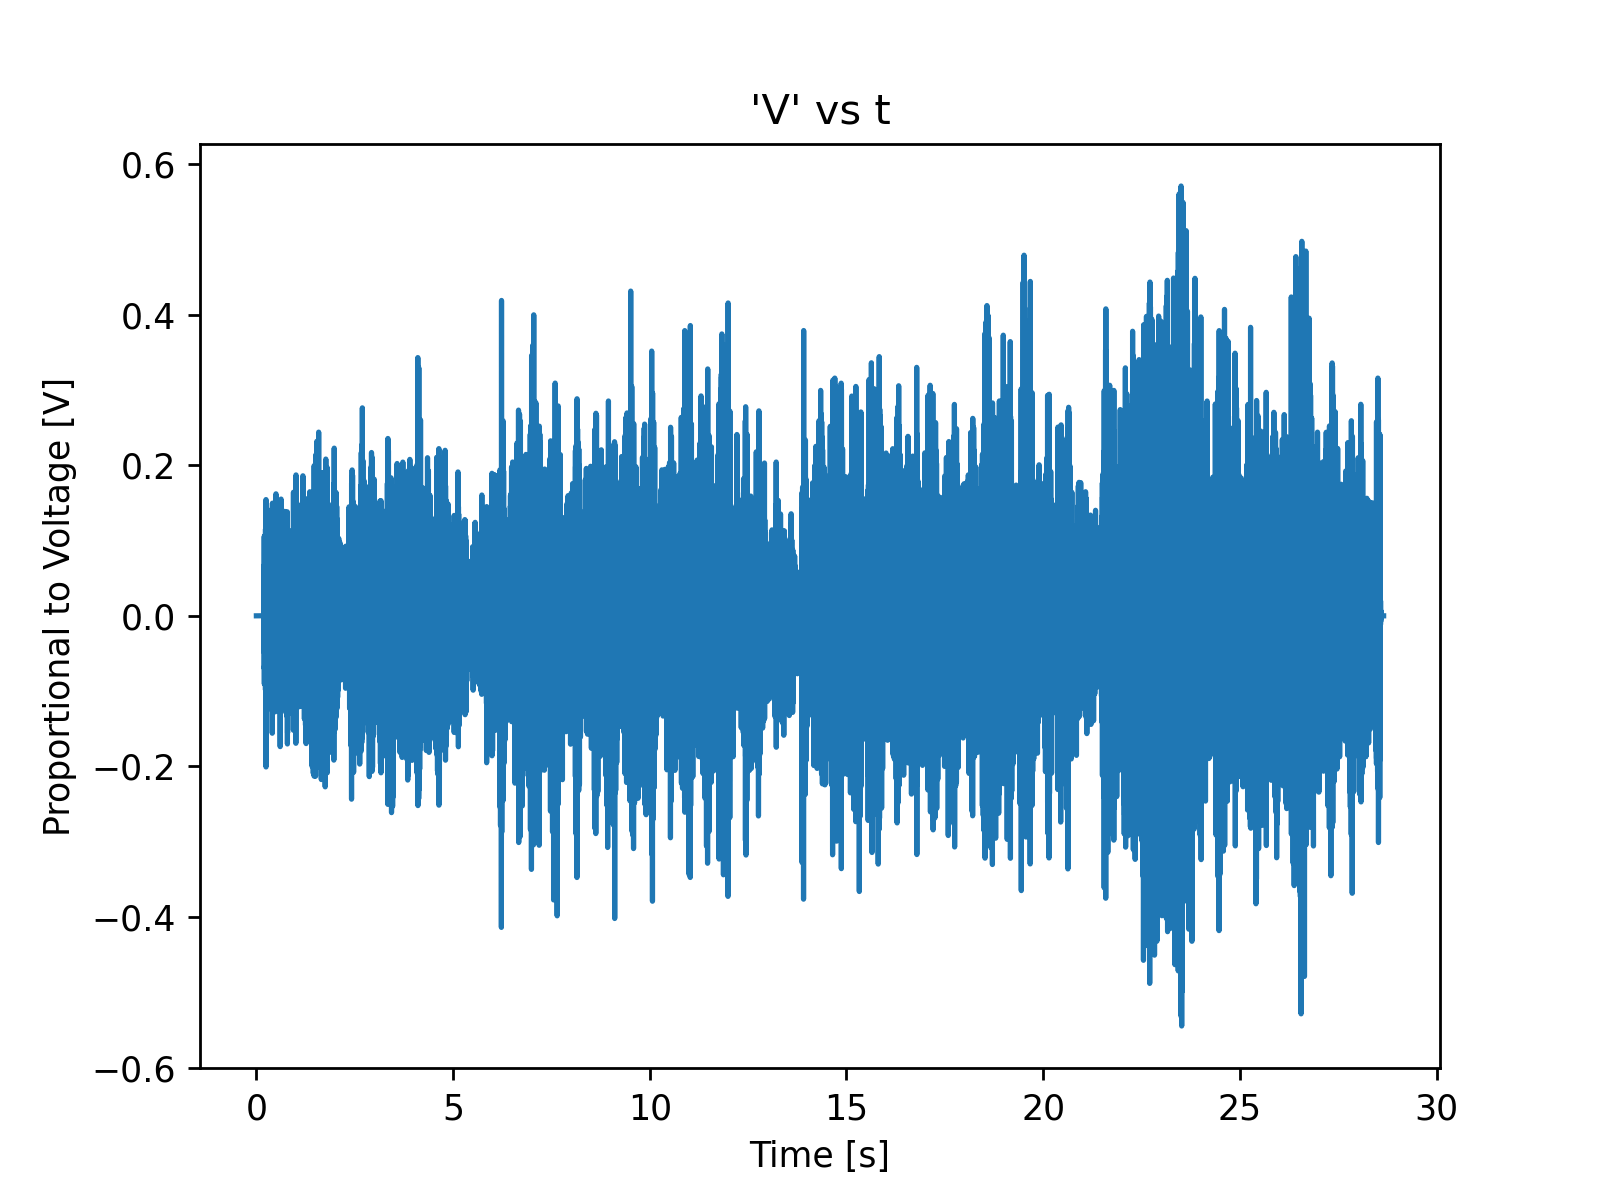

In [ ]:
fig, ax = plt.subplots()
ax.plot(times[::30], samples[::30]) # plot sound every (44100/30 = 1470)th of a second
ax.set_xlabel("Time [s]")
ax.set_ylabel("Proportional to Voltage [V]")
ax.set_title("'V' vs t")
plt.show()

<IPython.core.display.Javascript object>


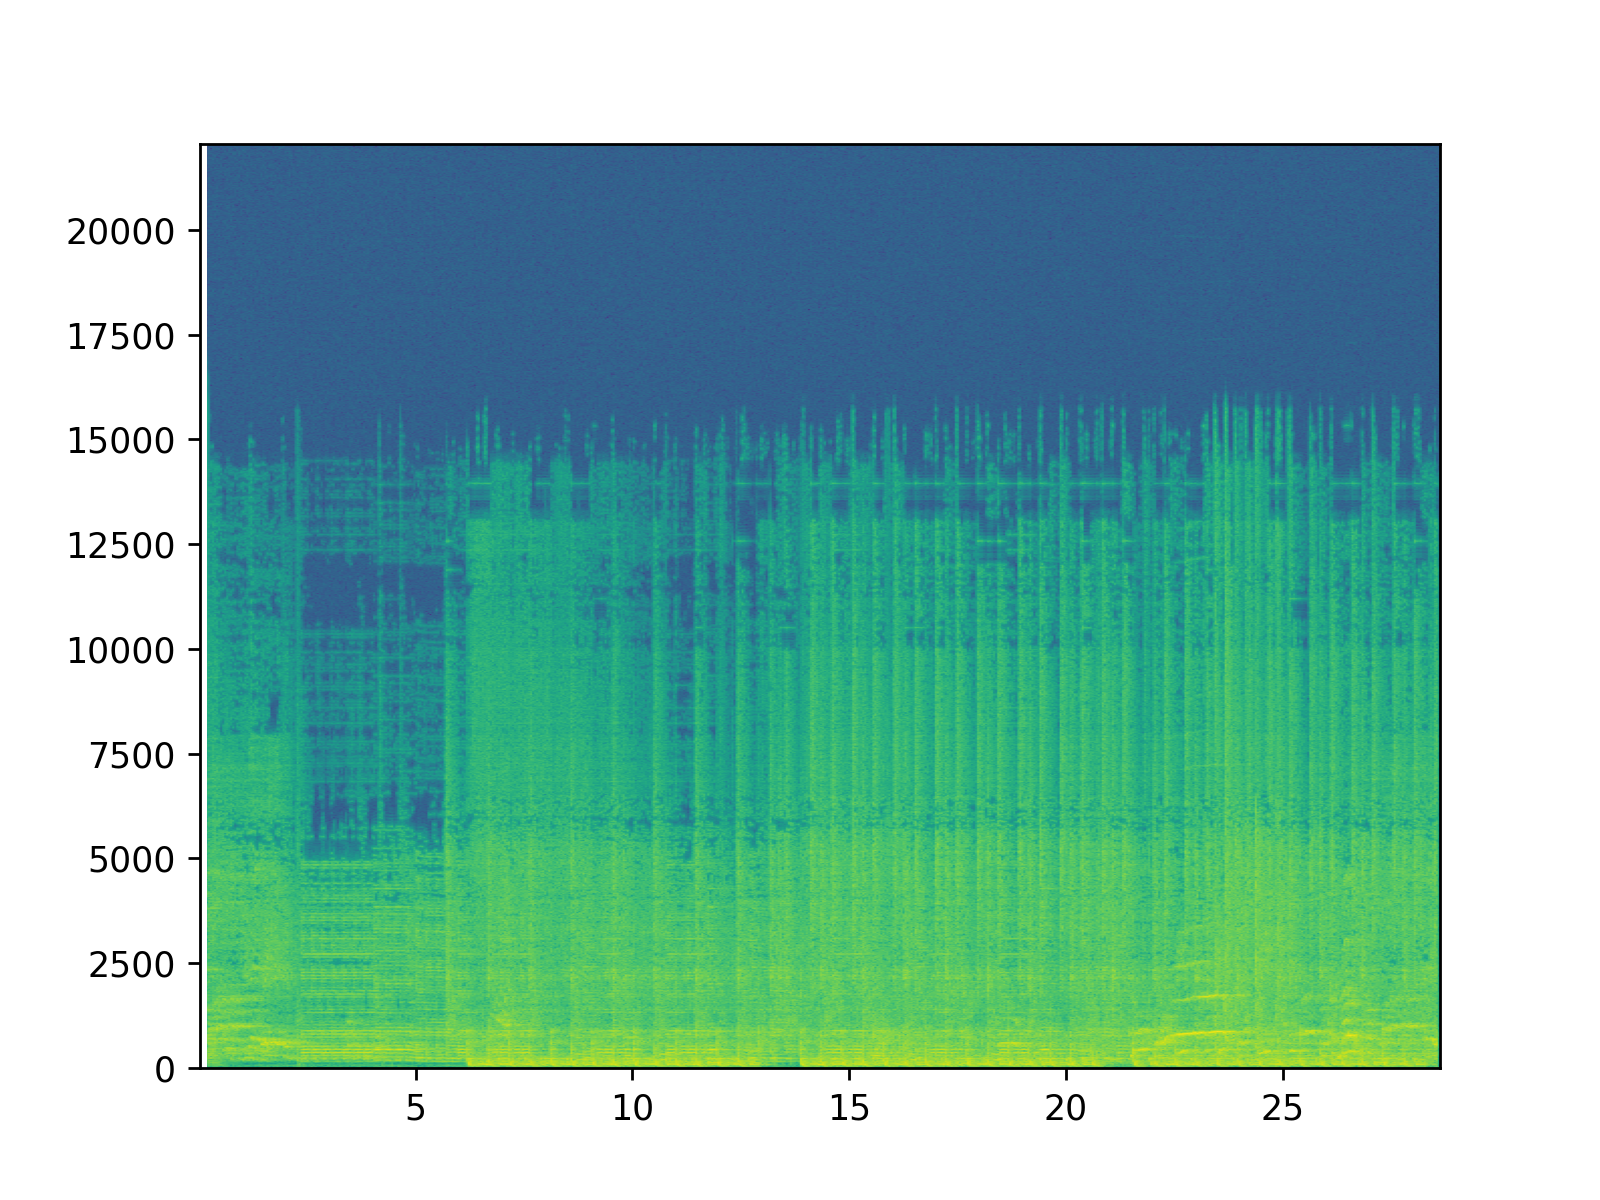

/Users/eloisezeng/opt/anaconda3/envs/week1/lib/python3.8/site-packages/matplotlib/axes/_axes.py:7628: RuntimeWarning: divide by zero encountered in log10
  Z = 20. * np.log10(spec)


In [ ]:
fig, ax = plt.subplots() # plot a spectrogram just to see if it will be helpful in detecting peaks. It wasn't.
spectrogram, freqs, times, im = ax.specgram(
    samples,
    NFFT=4096,
    Fs=sampling_rate,
    window=mlab.window_hanning,
    noverlap=4096 // 2,
    mode='magnitude',
    scale="dB"
)

<IPython.core.display.Javascript object>


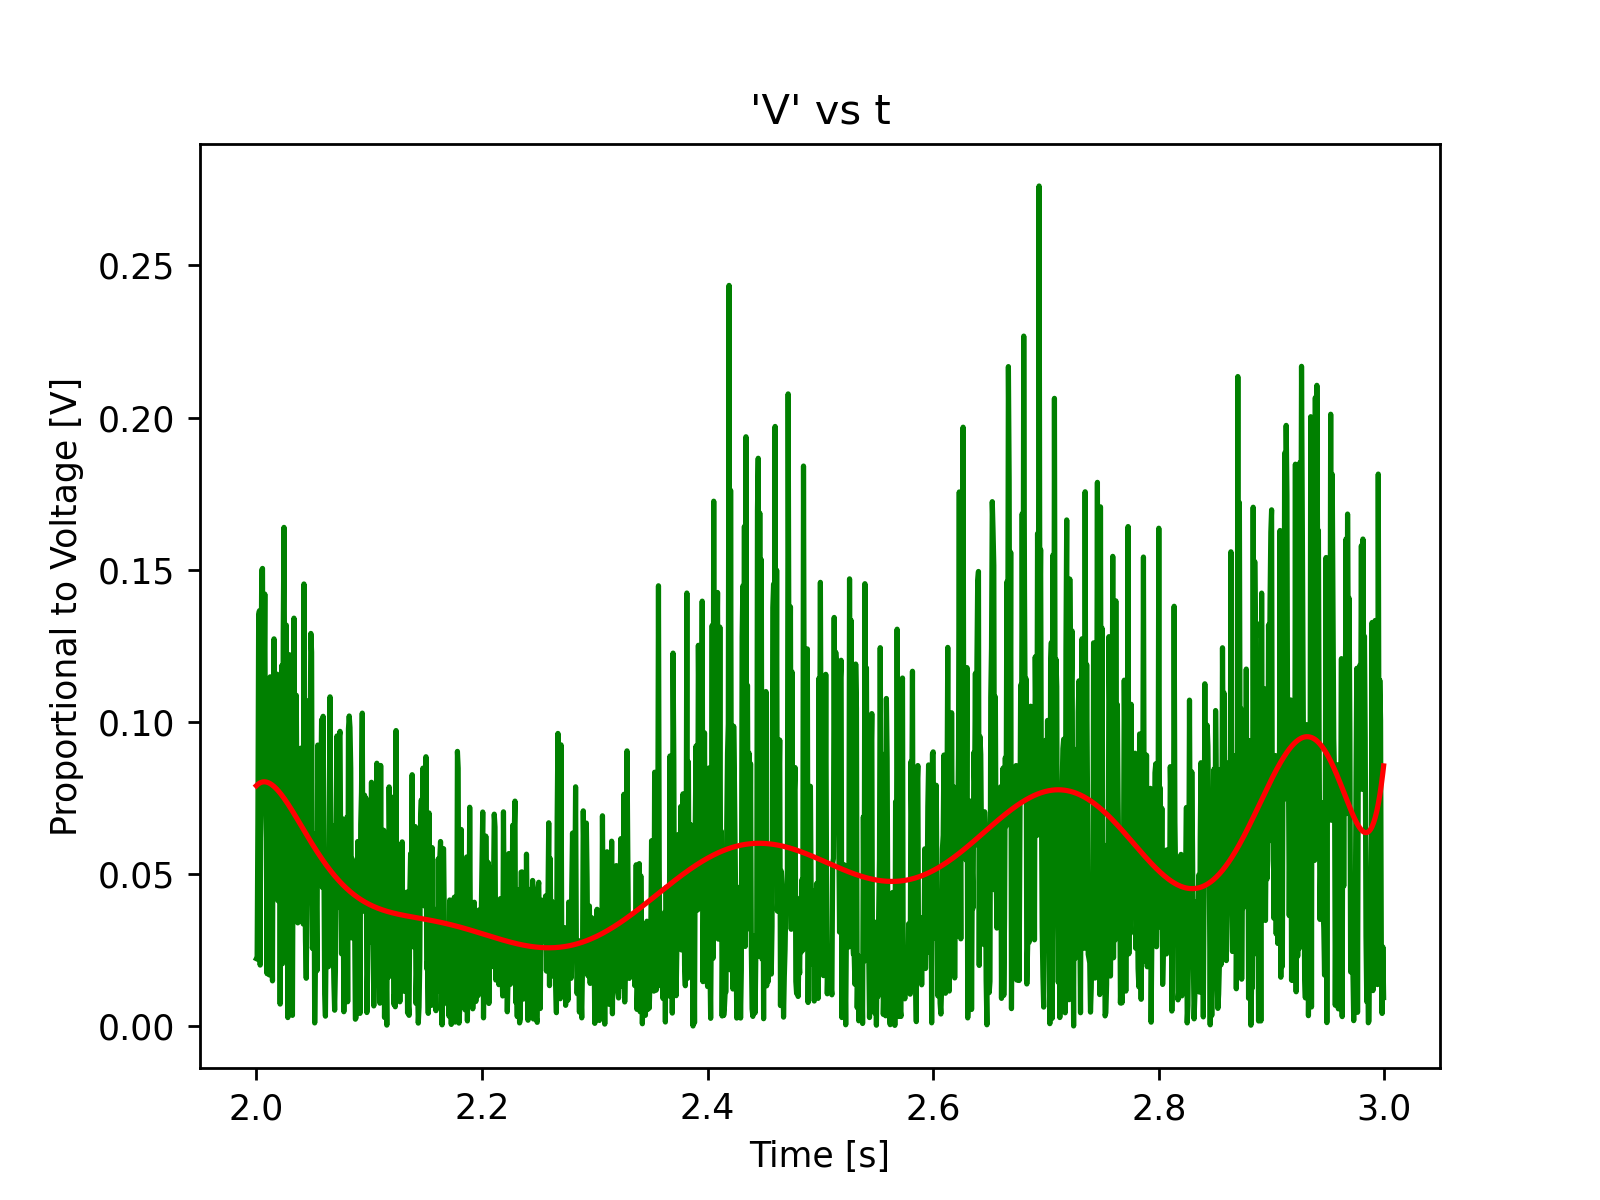

/Users/eloisezeng/opt/anaconda3/envs/week1/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3397: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, "'V' vs t")

In [ ]:
# create scatterplot
fig, ax = plt.subplots()
start_time = 2 # start time of audio clip
end_time = 3 # end time of audio clip
clipped_times = times[round(start_time * sample_rate):
                      round(end_time * sample_rate):
                      30] # reads every 1470th of a second of audio. I chose 30 as the step
# because I thought the code would read every 1/30th of a second, but later I realized I was wrong. 30, however, worked nicely. The polynomials fit well
# to the curves, unlike when I tried 1470 as the step.
clipped_samples = abs(samples[round(start_time * sample_rate):
                                    round(end_time * sample_rate):
                                    30])

degree = 20 # I tested a bunch of degrees and this one worked best. If you test degrees greater than a 1000, your computer might say it can't.
# That's why I fit a polynomial to each audio clip instead of the entire clip.
model = np.poly1d(np.polyfit(clipped_times, clipped_samples, degree))

ax.plot(clipped_times, clipped_samples, color='green')
ax.plot(clipped_times, model(clipped_times), color='red')
ax.set_xlabel("Time [s]")
ax.set_ylabel("Proportional to Voltage [V]")
ax.set_title("'V' vs t")

<IPython.core.display.Javascript object>


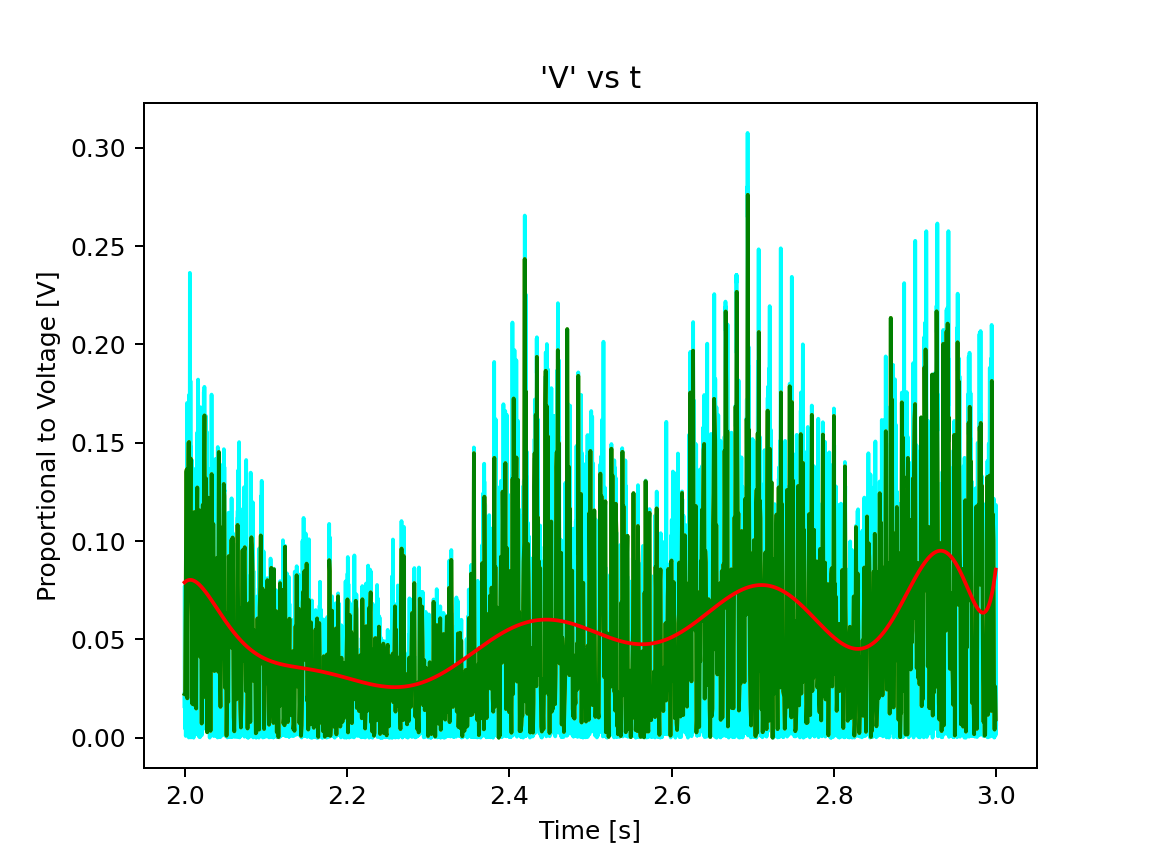

peak_indices [  10  655 1045 1369]
peak_times [array([2.00680272, 2.44557823, 2.71088435, 2.93129252])]


/Users/eloisezeng/opt/anaconda3/envs/week1/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3397: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, "'V' vs t")

In [ ]:
# testing peak-finding code, one clip at a time.
fig, ax = plt.subplots()
clip_time = 1 # length of audio clip is one second
peak_times = []
peak_values = []
for start_time in range(2, 29, clip_time):
    clipped_times = times[round(start_time * sample_rate):
                          round((start_time + clip_time) * sample_rate):
                          30]
    clipped_samples = abs(samples[round(start_time * sample_rate):
                                        round((start_time + clip_time) * sample_rate):
                                        30])
    degree = 20
    model = np.poly1d(np.polyfit(clipped_times, clipped_samples, degree)) # fit model to audio graph
    smooth_samples = model(clipped_times) # get y-values to the model in the audio graph
    peak_indices, _ = find_peaks(smooth_samples, height=0) # find the indices of peaks within the `smooth_samples` array using scipy's function
    peak_times += [start_time + (peak_indices) * 30 / sample_rate] # append the time of the peak
    peak_values += [smooth_samples[peak_indices]] # append the value of the peak (so we can plot it)
    break

# print(len(clipped_times)) # 1470 = 44100 / 30
print('peak_indices', peak_indices) # `peaks` records the indices of the peaks in smooth_samples,
# which has length 1470.
print('peak_times', peak_times)

# plot audio graph at 44100 Hz sample rate
ax.plot(times[round(start_time * sample_rate):
                    round((start_time + clip_time) * sample_rate)],
        abs(samples[round(start_time * sample_rate):
                    round((start_time + clip_time) * sample_rate)]), color='cyan')
# plot audio graph at 1470 Hz sample rate
ax.plot(times[round(start_time * sample_rate):
                    round((start_time + clip_time) * sample_rate):30],
        abs(samples[round(start_time * sample_rate):
                    round((start_time + clip_time) * sample_rate):30]), color='orange')
# plot clipped_times and clipped sample. Should be same as the plot above
ax.plot(clipped_times, clipped_samples, color='green')
ax.plot(clipped_times, smooth_samples, color='red')
# ax.plot(times, samples, color='green')
# ax.plot(peak_times, peak_values, "x", color='orange') # I forgot to uncomment this code when I ran the cell below. Trust me, it works though

ax.set_xlabel("Time [s]")
ax.set_ylabel("Proportional to Voltage [V]")
ax.set_title("'V' vs t")

<IPython.core.display.Javascript object>


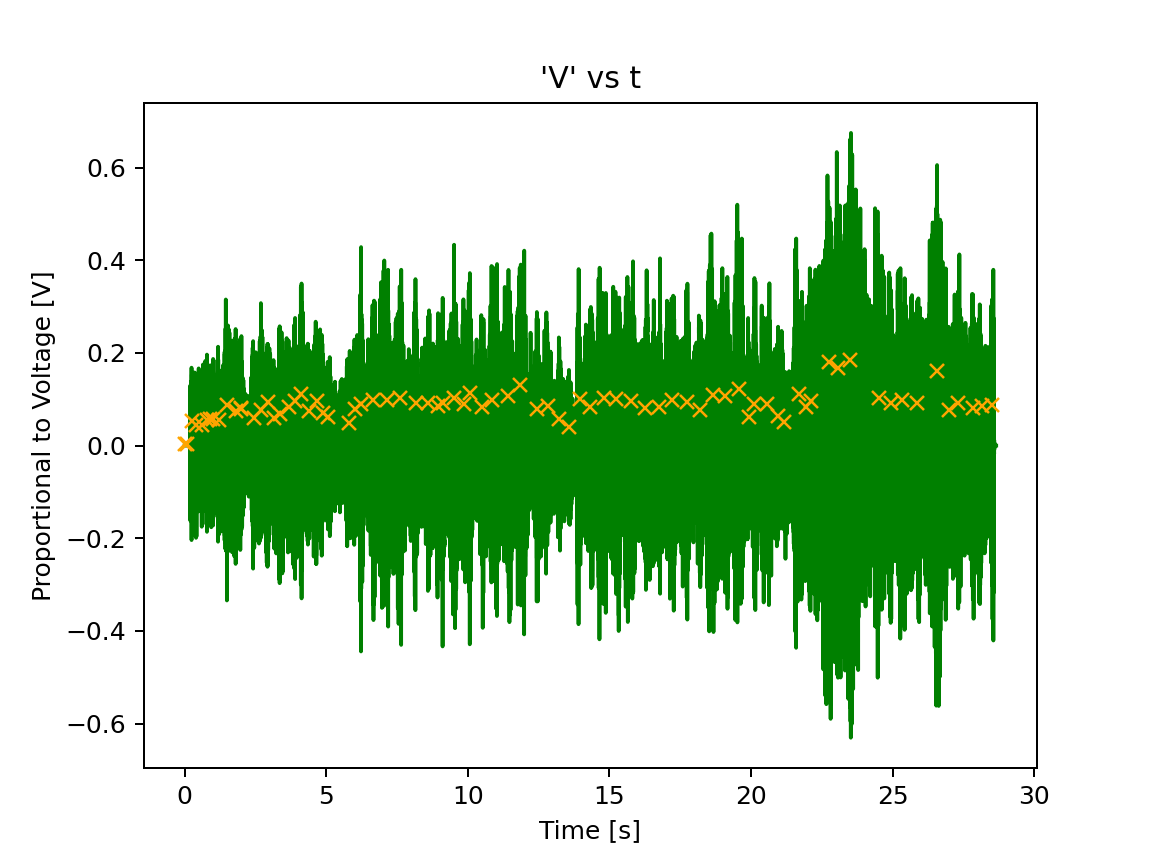

/Users/eloisezeng/opt/anaconda3/envs/week1/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3397: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/eloisezeng/opt/anaconda3/envs/week1/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3397: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/eloisezeng/opt/anaconda3/envs/week1/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3397: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/eloisezeng/opt/anaconda3/envs/week1/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3397: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/eloisezeng/opt/anaconda3/envs/week1/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3397: RankWarning: Polyfit may be poorly conditioned
  exec(

Text(0.5, 1.0, "'V' vs t")

In [ ]:
# same as above except I'm not breaking the for-loop!
fig, ax = plt.subplots()
clip_time = 1
peak_times = []
peak_frames = []
peak_values = []
for start_time in range(0, 29, clip_time):
    clipped_times = times[round(start_time * sample_rate):
                          round((start_time + clip_time) * sample_rate):
                          30]
    clipped_samples = abs(samples[round(start_time * sample_rate):
                                        round((start_time + clip_time) * sample_rate):
                                        30])
    degree = 20
    model = np.poly1d(np.polyfit(clipped_times, clipped_samples, degree))
    smooth_samples = model(clipped_times)
    peak_indices, _ = find_peaks(smooth_samples, height=0) # shape-1470
    peak_times += (start_time + peak_indices * 30 / sample_rate).tolist()
    peak_values += (smooth_samples[peak_indices]).tolist()
# print(len(clipped_times)) # 1470 = 44100 / 30
# print('peak_indices', peak_indices) # `peaks` records the indices of the peaks in smooth_samples,
# # which has length 1470.
# print('peak_times', peak_times)

ax.plot(times, samples, color='green')

# ax.plot(times, samples, color='green')
# print(peak_times)
# print(peak_values)
ax.plot(peak_times, peak_values, "x", color='orange')

ax.set_xlabel("Time [s]")
ax.set_ylabel("Proportional to Voltage [V]")
ax.set_title("'V' vs t")
# print(peak_times)

In [ ]:
peak_times

[0.011564625850340135,
 0.08095238095238096,
 0.25578231292517006,
 0.4170068027210884,
 0.6095238095238096,
 0.780952380952381,
 0.9115646258503401,
 0.9965986394557823,
 1.2163265306122448,
 1.4891156462585033,
 1.814965986394558,
 1.980952380952381,
 2.006802721088435,
 2.445578231292517,
 2.7108843537414966,
 2.9312925170068027,
 3.139455782312925,
 3.3659863945578232,
 3.6775510204081634,
 3.9006802721088434,
 4.11156462585034,
 4.376190476190477,
 4.6755102040816325,
 4.887074829931973,
 5.06734693877551,
 5.815646258503401,
 6.029931972789115,
 6.24421768707483,
 6.660544217687075,
 7.141496598639455,
 7.595238095238095,
 8.154421768707483,
 8.593197278911564,
 8.94625850340136,
 9.12108843537415,
 9.519047619047619,
 9.881632653061224,
 10.068027210884354,
 10.489115646258503,
 10.868707482993198,
 11.423809523809524,
 11.848979591836734,
 12.43061224489796,
 12.818367346938775,
 13.231972789115646,
 13.562585034013605,
 13.9421768707483,
 14.327891156462584,
 14.80204081632653

In [ ]:
peak_frames = np.round(np.array(peak_times) * 30) # store the frame numbers at which the audio peaks
print(len(peak_frames))
print(peak_frames)

80
[  0.   2.   8.  13.  18.  23.  27.  30.  36.  45.  54.  59.  60.  73.
  81.  88.  94. 101. 110. 117. 123. 131. 140. 147. 152. 174. 181. 187.
 200. 214. 228. 245. 258. 268. 274. 286. 296. 302. 315. 326. 343. 355.
 373. 385. 397. 407. 418. 430. 444. 457. 472. 488. 502. 516. 532. 546.
 560. 573. 588. 598. 603. 617. 628. 635. 650. 658. 664. 683. 692. 704.
 736. 748. 760. 776. 797. 810. 819. 835. 844. 855.]


In [ ]:
30 * 28 # confirming we get 840 frames

840

In [ ]:
np.save("peak_frames.npy", peak_frames) # save the array of peak_frames in a numpy file

In [ ]:
with open('peak_frames.npy', 'rb') as f:
    peak_frames = np.load(f)
peak_frames

array([  0.,   2.,   8.,  13.,  18.,  23.,  27.,  30.,  36.,  45.,  54.,
        59.,  60.,  73.,  81.,  88.,  94., 101., 110., 117., 123., 131.,
       140., 147., 152., 174., 181., 187., 200., 214., 228., 245., 258.,
       268., 274., 286., 296., 302., 315., 326., 343., 355., 373., 385.,
       397., 407., 418., 430., 444., 457., 472., 488., 502., 516., 532.,
       546., 560., 573., 588., 598., 603., 617., 628., 635., 650., 658.,
       664., 683., 692., 704., 736., 748., 760., 776., 797., 810., 819.,
       835., 844., 855.])